# **Projet portant sur les réseaux de neurones**
### **Réalisé par Fréjoux Gaëtan et Niord Mathieu**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Développement d'un perceptron
α sera égal à 0.1

### 1.1. Mise en place d'un perceptron simple

* *Créez la fonction `perceptron_simple(x, w, active)`*

In [2]:
ALPHA = 0.1  # learning rate

def perceptron_simple(x, w, active):
  seuil = w[0]
  dot = np.dot(x, w[1:])
  x = seuil + dot
  return np.sign(x) if (active == 0) else np.tanh(x)


def plot_with_class(X, weight, c, title, min_y, max_y):
    x = np.linspace(min_y, max_y)
    y = (weight[0] + x*weight[1]) / (-weight[2])
    
    plt.plot(x, y)
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=c)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.xlim(min_y, max_y)
    plt.ylim(min_y, max_y)
    
    return plt

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer le perceptron simple**

Nous avons utilisé la fonction `np.dot` pour calculer le produit scalaire entre les vecteurs `x` et `w`. Ensuite nous avons ajouté le seuil à ce produit scalaire. Enfin nous avons utilisé la valeur de `active` pour obtenir la sortie du perceptron avec différentes fonctions d'activation (ici `np.tanh` et `np.sign`).

* *Testez votre perceptron avec l'exemple du OU logique vu en cours (en utilisant la fonction `sign(x)` comme fonction d'activation)*

**Montrez que votre code fonctionne dans le cas du OU**

In [3]:
W_OR = np.array([-0.5, 1, 1])
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

Result_OR = perceptron_simple(X, W_OR, 0) # TODO: fix this pcq j'ai pas compris son truc avec sign(x)
print(Result_OR)

[-1.  1.  1.  1.]


Le vecteur retourné par notre perceptron semble correspondre à la sortie attendue (OU logique). Effectivement, nous notons l'exclusion d'un unique élément que nous pourrions symboliser par un `false` (ici -1) quand les trois autres éléments vaudraient un `true` (ici 1).

* *Affichez dans le cadre de l'exemple du OU logique sur la même figure les différents éléments de l'ensemble d'apprentissage et la droite séparatrice associée aux poids du neurone sur la même figure*

**Affichez la figure individu/frontière et commentez**

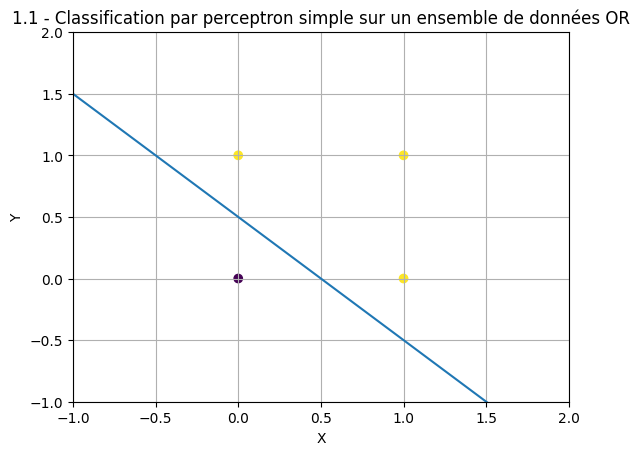

In [4]:
plot_with_class(
    X, W_OR, Result_OR,
    "1.1 - Classification par perceptron simple sur un ensemble de données OR",
    -1, 2
).show()

Comme nous pouvons le voir ci-dessus, le perceptron a bel et bien était capable de séparer les points en deux groupes distincts illustrant le OU logique : trois points jaune au-dessus de la droite (car leurs sorties valaient 1), le dernier point se situant en-dessous de la séparation et se retrouvant alors exclu de ces derniers (car sa sortie valait -1). Ce résultat nous est retourné de par les coordonnées des quatre points ainsi que par les poids de nos tableaux respectifs `X` et `W` fixés plus tôt. Puisque le paramètre `active` vaut 0, la fonction d'activation utilisée est ici `np.sign`, appliquée à la somme pondérée des entrées.

### 1.2. Etude de l'apprentissage

#### 1.2.1. Programmation apprentissage Widrow-Hoff

* *Créez la fonction `apprentissage_widrow(x, yd, epoch, batch_size)`. La droite séparatrice et les points d'apprentissage doivent être affichés à chaque itération (une itération correspond à la présentation de tous les individus de l'ensemble d'apprentissage), ains que l'erreur de classification*

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer l’apprentissage Widrow**

In [14]:
def apprentissage_widrow(x, yd, epoch, batch_size):

    w = np.random.randn(3)
    errors = []
    step = epoch // 10

    for i in range(epoch):

        w_temp = w
        errors.append(0)
        
        for j in range(len(x)):

            y = perceptron_simple(x[j], w, 1)  # with tanh
            r = - (yd[j] - y) * (1 - y * y)

            w_temp += ALPHA * r * np.array([1, x[j][0], x[j][1]])

            errors[i] += r**2

            if (j % batch_size) == 0: w = w_temp

        print("Epoch ", i + 1, " : ", errors[i]) # Errr value display
        
        #allow to show only 10 plots at max
        if (i % step == 0):
            plot_with_class(x, w, yd, "Epoch " + str(i + 1), min(x.T[0]) - 0.1, max(x.T[0]) + 0.1).show()

        if (errors[i] == 0 or (i != 0 and (errors[i - 1] - errors[i] == 0))): break

    return w, errors

Il est tout d'abord important de préciser que nos poids ont été initialisés aléatoirement à l'aide de la fonction `randn()` de `np.random`. À l'intérieur de notre fonction, nous avons bouclé sur `epoch` itérations et pour chaque itération, il a fallu calculer la sortie du perceptron pour chacun des individus afin de pouvoir rééquilibré nos poids en fonction de l'erreur de classification. Nous avons réexploité notre précédente fonction `perceptron_simple()` en fixant le paramètre `active` à 0 pour fixer la valeur de retour à `np.tanh()`.

De manière à pouvoir suivre l'évolution de l'apprentissage, nous avons affiché la droite séparatrice toutes les `epoch/10` étapes (soit les 10% de palier itératif), ainsi que l'erreur de classification à chacune des itérations.

#### 1.2.2. Test 1 simple

* *Chargez les données p2_d1.txt*

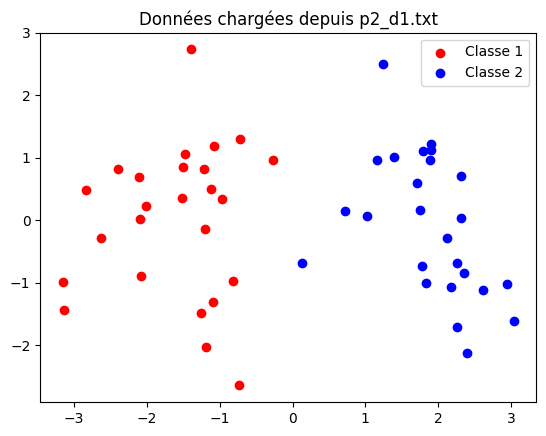

In [15]:
Data1 = np.loadtxt("res/p2_d1.txt")
CLASSIF = [1]*25 + [-1]*25
plt.title("Données chargées depuis p2_d1.txt")
plt.scatter(Data1[0, :25], Data1[1, :25], c='r')
plt.scatter(Data1[0, 25:], Data1[1, 25:], c='b')
plt.legend(['Classe 1', 'Classe 2'])

* *Appliquez l'algorithme d'apprentissage sur les données. Affichez l'évolution de l'erreur. Vérifiez que la frontière est correcte*

Epoch  1  :  7.2223446270751275


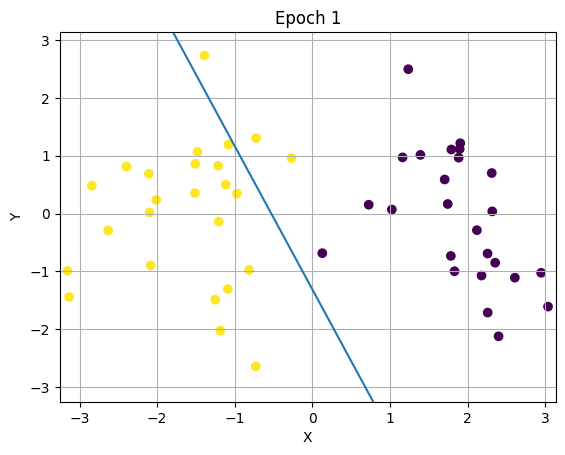

Epoch  2  :  4.148369731335332
Epoch  3  :  2.4552949967071442
Epoch  4  :  2.270717996992387
Epoch  5  :  2.340751697493198
Epoch  6  :  2.2116775932729613
Epoch  7  :  1.9913275371506842
Epoch  8  :  1.7894066930007209
Epoch  9  :  1.630434628676956
Epoch  10  :  1.506664204063595
Epoch  11  :  1.4069512172620349
Epoch  12  :  1.3231661062831963
Epoch  13  :  1.2501658625680143
Epoch  14  :  1.1848167546097612
Epoch  15  :  1.125211073324089
Epoch  16  :  1.070167527396871
Epoch  17  :  1.0189322871413193
Epoch  18  :  0.9710034397190876
Epoch  19  :  0.9260283473973799
Epoch  20  :  0.8837436455600721
Epoch  21  :  0.8439401788919217
Epoch  22  :  0.8064425533994001
Epoch  23  :  0.7710972623443737
Epoch  24  :  0.7377658323870803
Epoch  25  :  0.7063208925544867
Epoch  26  :  0.6766439272039204
Epoch  27  :  0.6486239832122681
Epoch  28  :  0.6221569044660813
Epoch  29  :  0.5971448469708672
Epoch  30  :  0.5734959348558029
Epoch  31  :  0.5511239805763365
Epoch  32  :  0.529948229

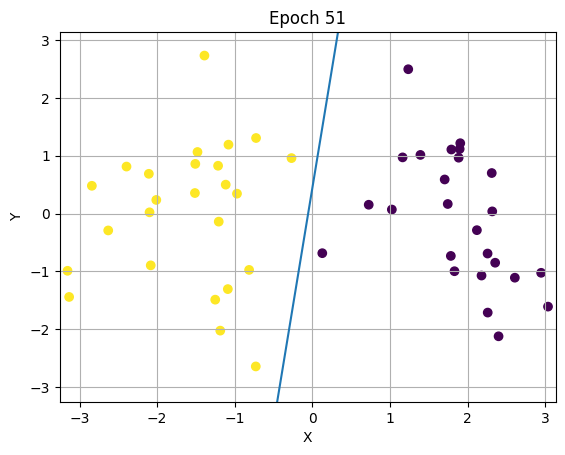

Epoch  52  :  0.2707983031239184
Epoch  53  :  0.263109493718617
Epoch  54  :  0.25573596686202255
Epoch  55  :  0.24866116695839707
Epoch  56  :  0.24186957613997506
Epoch  57  :  0.23534664051755771
Epoch  58  :  0.22907870209324468
Epoch  59  :  0.22305293589461841
Epoch  60  :  0.2172572919200458
Epoch  61  :  0.2116804415142622
Epoch  62  :  0.2063117278217434
Epoch  63  :  0.20114111999225695
Epoch  64  :  0.196159170838411
Epoch  65  :  0.19135697766879012
Epoch  66  :  0.18672614604249613
Epoch  67  :  0.18225875621150103
Epoch  68  :  0.1779473320363605
Epoch  69  :  0.17378481217843916
Epoch  70  :  0.16976452338806655
Epoch  71  :  0.1658801557230021
Epoch  72  :  0.1621257395452894
Epoch  73  :  0.15849562415722415
Epoch  74  :  0.15498445794865587
Epoch  75  :  0.15158716993846227
Epoch  76  :  0.14829895260269033
Epoch  77  :  0.14511524589073227
Epoch  78  :  0.14203172233900196
Epoch  79  :  0.13904427319898036
Epoch  80  :  0.1361489955033059
Epoch  81  :  0.1333421799

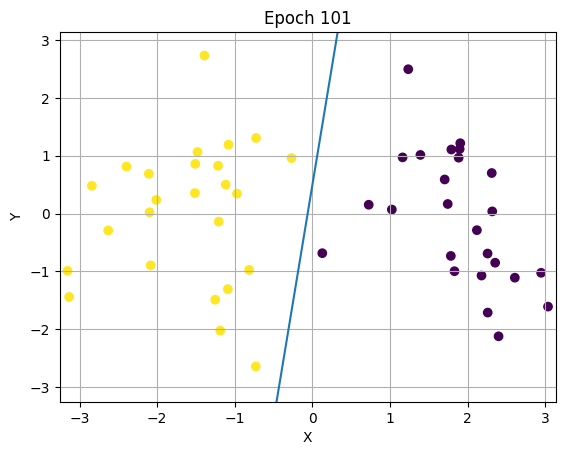

Epoch  102  :  0.08983437524353495
Epoch  103  :  0.08831651785907015
Epoch  104  :  0.086836508704152
Epoch  105  :  0.08539310891053267
Epoch  106  :  0.08398512952391911
Epoch  107  :  0.08261142912793469
Epoch  108  :  0.08127091159795317
Epoch  109  :  0.07996252397682344
Epoch  110  :  0.07868525446505242
Epoch  111  :  0.0774381305185066
Epoch  112  :  0.07622021704716163
Epoch  113  :  0.07503061470886221
Epoch  114  :  0.07386845829245231
Epoch  115  :  0.07273291518500123
Epoch  116  :  0.07162318391820711
Epoch  117  :  0.0705384927893661
Epoch  118  :  0.0694780985526008
Epoch  119  :  0.06844128517631481
Epoch  120  :  0.06742736266309517
Epoch  121  :  0.06643566592852686
Epoch  122  :  0.06546555373560288
Epoch  123  :  0.06451640768162233
Epoch  124  :  0.06358763123465891
Epoch  125  :  0.06267864881686433
Epoch  126  :  0.0617889049320427
Epoch  127  :  0.06091786333507454
Epoch  128  :  0.06006500624093561
Epoch  129  :  0.059229833571169684
Epoch  130  :  0.05841186

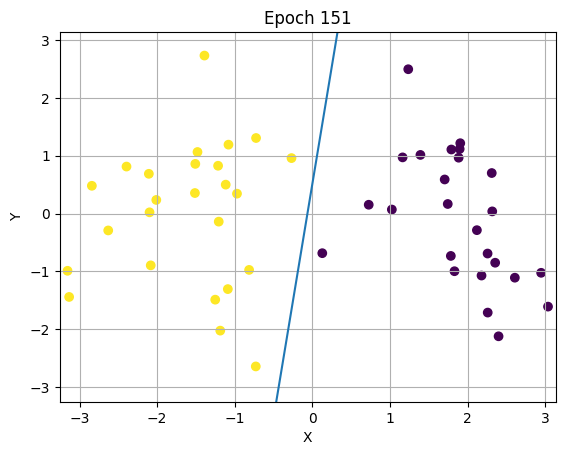

Epoch  152  :  0.0439668933791195
Epoch  153  :  0.04344182343414939
Epoch  154  :  0.04292606208424269
Epoch  155  :  0.04241939143624238
Epoch  156  :  0.0419215999124955
Epoch  157  :  0.04143248203322171
Epoch  158  :  0.0409518382075502
Epoch  159  :  0.0404794745328343
Epoch  160  :  0.04001520260187604
Epoch  161  :  0.039558839317700566
Epoch  162  :  0.03911020671555218
Epoch  163  :  0.03866913179178969
Epoch  164  :  0.03823544633937863
Epoch  165  :  0.037808986789693
Epoch  166  :  0.03738959406035148
Epoch  167  :  0.03697711340882647
Epoch  168  :  0.03657139429158206
Epoch  169  :  0.036172290228497175
Epoch  170  :  0.035779658672356926
Epoch  171  :  0.03539336088319085
Epoch  172  :  0.03501326180725811
Epoch  173  :  0.034639229960484
Epoch  174  :  0.0342711373161604
Epoch  175  :  0.033908859196736474
Epoch  176  :  0.03355227416952772
Epoch  177  :  0.03320126394618361
Epoch  178  :  0.032855713285761465
Epoch  179  :  0.03251550990125803
Epoch  180  :  0.0321805

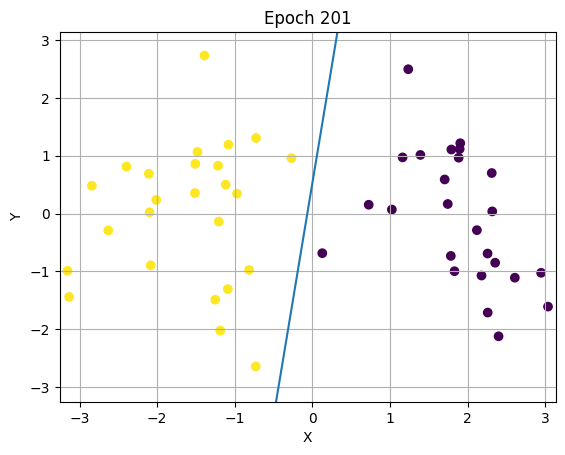

Epoch  202  :  0.02594614464449937
Epoch  203  :  0.025706911753094978
Epoch  204  :  0.025470962368709466
Epoch  205  :  0.02523823682988131
Epoch  206  :  0.025008676820964932
Epoch  207  :  0.024782225335943563
Epoch  208  :  0.024558826643368573
Epoch  209  :  0.024338426252388193
Epoch  210  :  0.024120970879824087
Epoch  211  :  0.02390640841826211
Epoch  212  :  0.02369468790511992
Epoch  213  :  0.023485759492658142
Epoch  214  :  0.02327957441890143
Epoch  215  :  0.023076084979440158
Epoch  216  :  0.022875244500080383
Epoch  217  :  0.02267700731031334
Epoch  218  :  0.022481328717578613
Epoch  219  :  0.022288164982290925
Epoch  220  :  0.022097473293607506
Epoch  221  :  0.021909211745909214
Epoch  222  :  0.021723339315973124
Epoch  223  :  0.0215398158408115
Epoch  224  :  0.021358601996157574
Epoch  225  :  0.021179659275574244
Epoch  226  :  0.021002949970166614
Epoch  227  :  0.02082843714887825
Epoch  228  :  0.0206560846393523
Epoch  229  :  0.020485857009338065
Epo

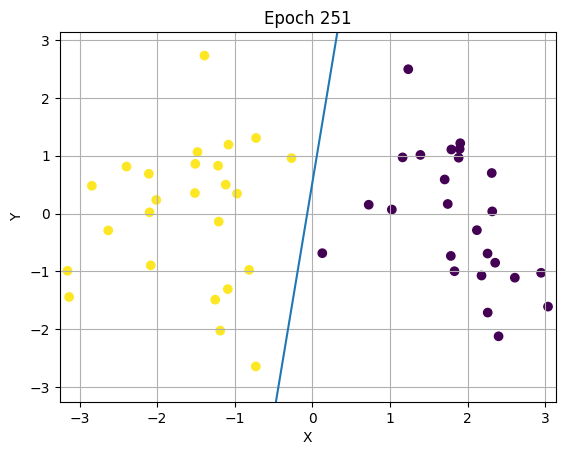

Epoch  252  :  0.01708533832364938
Epoch  253  :  0.01695712226727676
Epoch  254  :  0.016830340783894115
Epoch  255  :  0.01670497259220756
Epoch  256  :  0.016580996803430066
Epoch  257  :  0.016458392912640375
Epoch  258  :  0.0163371407903616
Epoch  259  :  0.01621722067435423
Epoch  260  :  0.016098613161618126
Epoch  261  :  0.015981299200595964
Epoch  262  :  0.01586526008357399
Epoch  263  :  0.015750477439271937
Epoch  264  :  0.015636933225620334
Epoch  265  :  0.015524609722716402
Epoch  266  :  0.015413489525955096
Epoch  267  :  0.015303555539331128
Epoch  268  :  0.01519479096890483
Epoch  269  :  0.015087179316429446
Epoch  270  :  0.014980704373134542
Epoch  271  :  0.01487535021366104
Epoch  272  :  0.014771101190143375
Epoch  273  :  0.014667941926435666
Epoch  274  :  0.014565857312477398
Epoch  275  :  0.014464832498794185
Epoch  276  :  0.014364852891131027
Epoch  277  :  0.014265904145214097
Epoch  278  :  0.014167972161636492
Epoch  279  :  0.014071043080866142
E

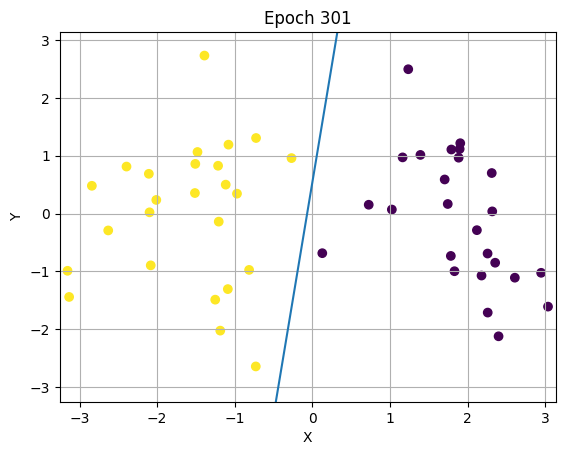

Epoch  302  :  0.012089822617729307
Epoch  303  :  0.01201335192692232
Epoch  304  :  0.011937603147517843
Epoch  305  :  0.011862567234829195
Epoch  306  :  0.011788235285192059
Epoch  307  :  0.011714598533337717
Epoch  308  :  0.01164164834982217
Epoch  309  :  0.011569376238511586
Epoch  310  :  0.011497773834121329
Epoch  311  :  0.011426832899807844
Epoch  312  :  0.011356545324812325
Epoch  313  :  0.011286903122153942
Epoch  314  :  0.011217898426373345
Epoch  315  :  0.011149523491322318
Epoch  316  :  0.011081770688001397
Epoch  317  :  0.01101463250244291
Epoch  318  :  0.010948101533637327
Epoch  319  :  0.010882170491505035
Epoch  320  :  0.010816832194908215
Epoch  321  :  0.010752079569706021
Epoch  322  :  0.010687905646848812
Epoch  323  :  0.010624303560512489
Epoch  324  :  0.010561266546271063
Epoch  325  :  0.010498787939306913
Epoch  326  :  0.010436861172658135
Epoch  327  :  0.010375479775500214
Epoch  328  :  0.010314637371464989
Epoch  329  :  0.01025432767699

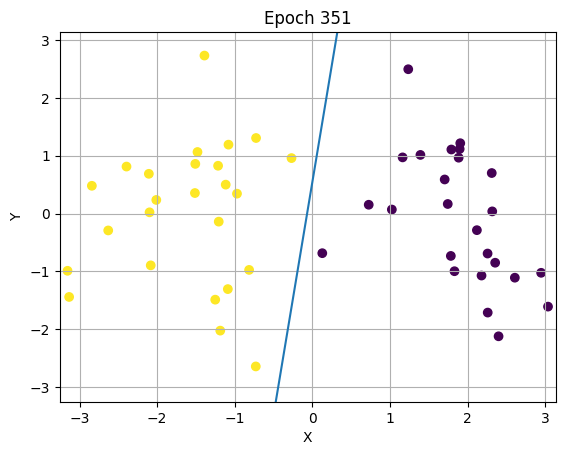

Epoch  352  :  0.009001046526170675
Epoch  353  :  0.008951852187155211
Epoch  354  :  0.008903059426192949
Epoch  355  :  0.008854663889728016
Epoch  356  :  0.008806661282979113
Epoch  357  :  0.008759047368991331
Epoch  358  :  0.008711817967704363
Epoch  359  :  0.00866496895504016
Epoch  360  :  0.008618496262005495
Epoch  361  :  0.00857239587381284
Epoch  362  :  0.008526663829016448
Epoch  363  :  0.008481296218665517
Epoch  364  :  0.008436289185471731
Epoch  365  :  0.008391638922993596
Epoch  366  :  0.008347341674834247
Epoch  367  :  0.00830339373385501
Epoch  368  :  0.00825979144140316
Epoch  369  :  0.008216531186553369
Epoch  370  :  0.008173609405363306
Epoch  371  :  0.008131022580142522
Epoch  372  :  0.008088767238734874
Epoch  373  :  0.00804683995381364
Epoch  374  :  0.008005237342188908
Epoch  375  :  0.007963956064128789
Epoch  376  :  0.007922992822690687
Epoch  377  :  0.00788234436306692
Epoch  378  :  0.007842007471939598
Epoch  379  :  0.00780197897684901

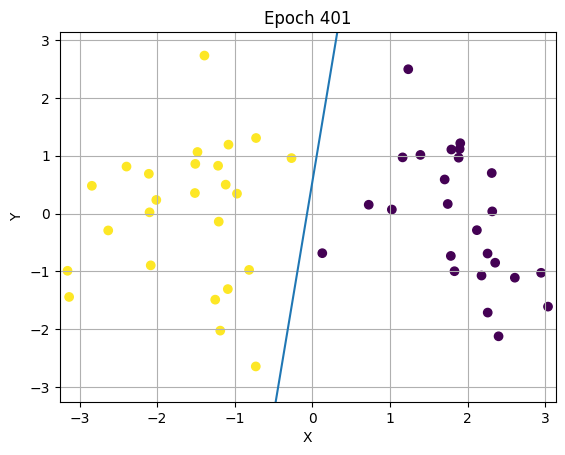

Epoch  402  :  0.0069597079717541995
Epoch  403  :  0.006926225395800223
Epoch  404  :  0.00689298354220759
Epoch  405  :  0.006859980111364567
Epoch  406  :  0.006827212831029858
Epoch  407  :  0.0067946794559424865
Epoch  408  :  0.006762377767438694
Epoch  409  :  0.006730305573075293
Epoch  410  :  0.006698460706258552
Epoch  411  :  0.006666841025879935
Epoch  412  :  0.00663544441595746
Epoch  413  :  0.006604268785282725
Epoch  414  :  0.006573312067074318
Epoch  415  :  0.006542572218636027
Epoch  416  :  0.006512047221021621
Epoch  417  :  0.006481735078703995
Epoch  418  :  0.006451633819250508
Epoch  419  :  0.006421741493003061
Epoch  420  :  0.0063920561727635675
Epoch  421  :  0.006362575953484564
Epoch  422  :  0.006333298951964298
Epoch  423  :  0.006304223306547406
Epoch  424  :  0.006275347176829699
Epoch  425  :  0.006246668743367912
Epoch  426  :  0.006218186207394624
Epoch  427  :  0.0061898977905362924
Epoch  428  :  0.00616180173453748
Epoch  429  :  0.0061338963

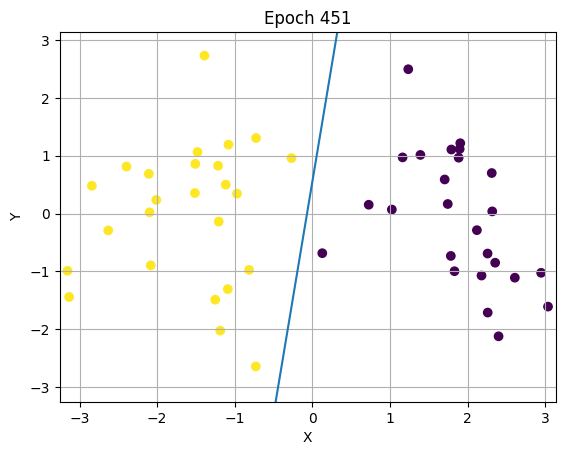

Epoch  452  :  0.00554096101856673
Epoch  453  :  0.005517156214433436
Epoch  454  :  0.005493504306602372
Epoch  455  :  0.005470003989683453
Epoch  456  :  0.005446653972177702
Epoch  457  :  0.005423452976299941
Epoch  458  :  0.005400399737804961
Epoch  459  :  0.005377493005815626
Epoch  460  :  0.005354731542653795
Epoch  461  :  0.005332114123673365
Epoch  462  :  0.005309639537096665
Epoch  463  :  0.005287306583852062
Epoch  464  :  0.005265114077414841
Epoch  465  :  0.005243060843649996
Epoch  466  :  0.005221145720657393
Epoch  467  :  0.0051993675586192705
Epoch  468  :  0.005177725219649693
Epoch  469  :  0.005156217577646719
Epoch  470  :  0.00513484351814603
Epoch  471  :  0.005113601938177097
Epoch  472  :  0.005092491746121562
Epoch  473  :  0.005071511861572849
Epoch  474  :  0.0050506612151989564
Epoch  475  :  0.005029938748606249
Epoch  476  :  0.005009343414205746
Epoch  477  :  0.0049888741750807875
Epoch  478  :  0.004968530004857306
Epoch  479  :  0.0049483098

In [16]:
w1, erreur1 = apprentissage_widrow(Data1.T, CLASSIF, 500, 25)
print('W1 : ', w1)

**Indiquez graphiquement quelques étapes de l’apprentissage (ensemble et droite de séparation)**

Voir ci-dessus.

**Représentez l’erreur en fonction des itérations**

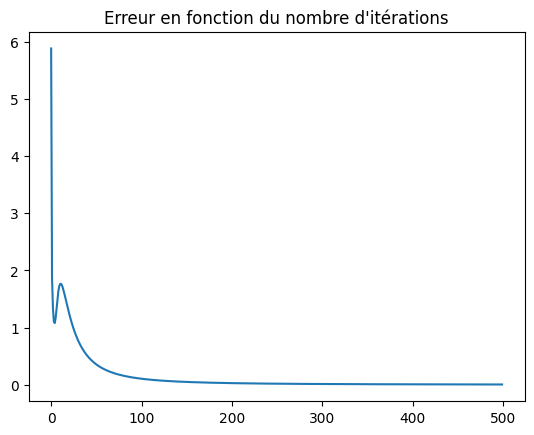

In [11]:
plt.title("Erreur en fonction du nombre d'itérations")
plt.plot(erreur1)
plt.show()

**Faites quelques tests avec des initialisations différentes, commentez le résultat après convergence**

On observe que l'erreur de classification tend vers 0. On remarque également que la droite séparatrice est bien la droite qui sépare les deux classes.

#### 1.2.3. Test 2

* *Charger les données p2_d2.txt*

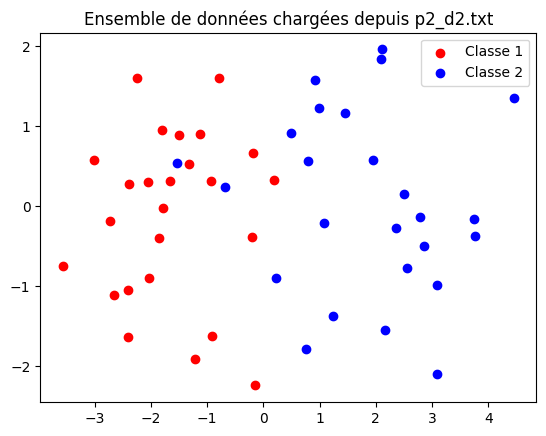

In [17]:
P2_DATA = np.loadtxt("res/p2_d2.txt")

plt.title("Ensemble de données chargées depuis p2_d2.txt")
plt.scatter(P2_DATA[0, :25], P2_DATA[1, :25], c='r')
plt.scatter(P2_DATA[0, 25:], P2_DATA[1, 25:], c='b')
plt.legend(['Classe 1', 'Classe 2'])
plt.show()

* *Appliquez l'algorithme d'apprentissage sur les données. Afficher l'évolution de l'erreur. Vérifier que la frontière est correcte*

Epoch  1  :  16.190877205358273


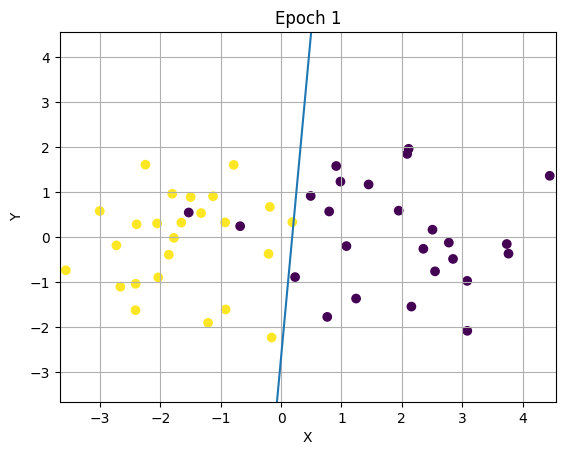

Epoch  2  :  7.0821524689759
Epoch  3  :  5.298158028457629
Epoch  4  :  4.247998284049131
Epoch  5  :  3.6697733169008173
Epoch  6  :  3.3020551004047882
Epoch  7  :  3.049548169273846
Epoch  8  :  2.8697685905386163
Epoch  9  :  2.739488885894376
Epoch  10  :  2.644384919444436
Epoch  11  :  2.574999730992294
Epoch  12  :  2.524824528156705
Epoch  13  :  2.489247032939067
Epoch  14  :  2.464920503068153
Epoch  15  :  2.449363572310995
Epoch  16  :  2.4406974180341887
Epoch  17  :  2.4374689952697683
Epoch  18  :  2.438530178745504
Epoch  19  :  2.442954244443489
Epoch  20  :  2.449977883264001
Epoch  21  :  2.4589610246000113
Epoch  22  :  2.4693592641321733
Epoch  23  :  2.4807052589538525
Epoch  24  :  2.4925964464275974
Epoch  25  :  2.5046870943626467
Epoch  26  :  2.5166831477723184
Epoch  27  :  2.5283386930886995
Epoch  28  :  2.539453164503165
Epoch  29  :  2.549868689544852
Epoch  30  :  2.5594672132706844
Epoch  31  :  2.568167244262538
Epoch  32  :  2.5759202217048376
Epoc

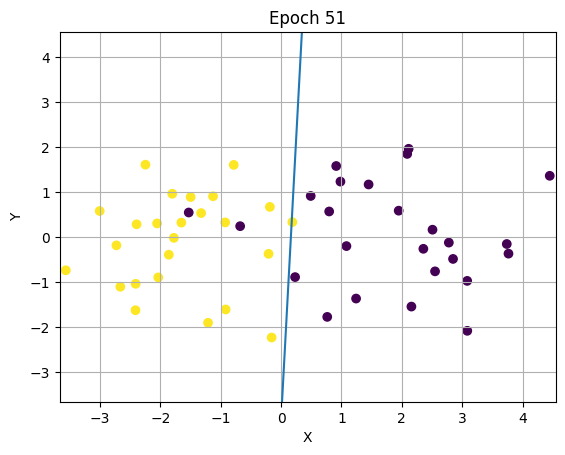

Epoch  52  :  2.603231803172463
Epoch  53  :  2.6042047627050997
Epoch  54  :  2.6057026106539176
Epoch  55  :  2.607786104367481
Epoch  56  :  2.6105118015211555
Epoch  57  :  2.6139317192793854
Epoch  58  :  2.618092946884671
Epoch  59  :  2.6230372086696088
Epoch  60  :  2.6288003769344104
Epoch  61  :  2.635411937022264
Epoch  62  :  2.6428944103226795
Epoch  63  :  2.651262744865379
Epoch  64  :  2.6605236876096923
Epoch  65  :  2.6706751573943683
Epoch  66  :  2.6817056426121937
Epoch  67  :  2.6935936527357995
Epoch  68  :  2.7063072574597915
Epoch  69  :  2.719803750949581
Epoch  70  :  2.734029480922041
Epoch  71  :  2.748919882404314
Epoch  72  :  2.7643997534189784
Epoch  73  :  2.7803838040242974
Epoch  74  :  2.796777500801821
Epoch  75  :  2.813478216047681
Epoch  76  :  2.8303766750099952
Epoch  77  :  2.847358676401717
Epoch  78  :  2.864307042432
Epoch  79  :  2.88110373642719
Epoch  80  :  2.897632070632244
Epoch  81  :  2.9137789158257874
Epoch  82  :  2.929436819458

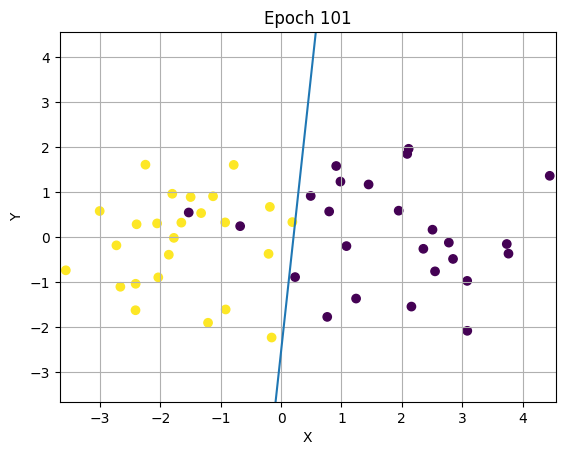

Epoch  102  :  3.063445701759297
Epoch  103  :  3.061271131651484
Epoch  104  :  3.058459610132873
Epoch  105  :  3.055044062865134
Epoch  106  :  3.0510559382828384
Epoch  107  :  3.0465251112821017
Epoch  108  :  3.04147984012435
Epoch  109  :  3.035946765481873
Epoch  110  :  3.029950941847057
Epoch  111  :  3.0235158928804133
Epoch  112  :  3.0166636836007603
Epoch  113  :  3.009415003568006
Epoch  114  :  3.0017892563414774
Epoch  115  :  2.993804651497279
Epoch  116  :  2.9854782963527278
Epoch  117  :  2.976826285276776
Epoch  118  :  2.967863785072603
Epoch  119  :  2.9586051154129227
Epoch  120  :  2.9490638237040523
Epoch  121  :  2.939252754064278
Epoch  122  :  2.929184110339039
Epoch  123  :  2.9188695132516713
Epoch  124  :  2.908320051914835
Epoch  125  :  2.897546330014039
Epoch  126  :  2.886558507028991
Epoch  127  :  2.875366334887909
Epoch  128  :  2.8639791904605314
Epoch  129  :  2.852406104291889
Epoch  130  :  2.840655785965398
Epoch  131  :  2.8287366464631813


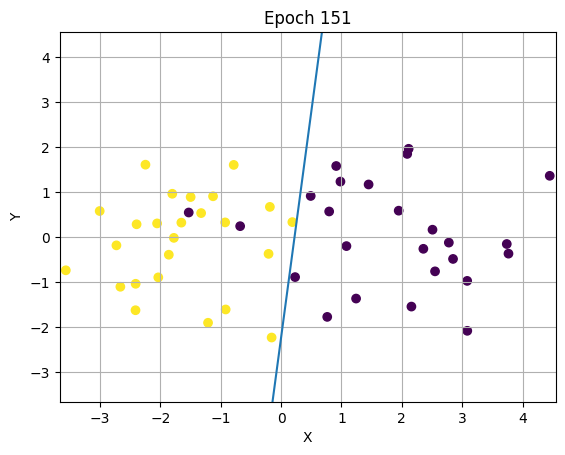

Epoch  152  :  2.5519020267271837
Epoch  153  :  2.5379560252731372
Epoch  154  :  2.5239789003191837
Epoch  155  :  2.5099748268425146
Epoch  156  :  2.495947858605836
Epoch  157  :  2.481901930643043
Epoch  158  :  2.4678408616787433
Epoch  159  :  2.453768356488917
Epoch  160  :  2.439688008208847
Epoch  161  :  2.425603300593515
Epoch  162  :  2.411517610234878
Epoch  163  :  2.397434208739726
Epoch  164  :  2.383356264871244
Epoch  165  :  2.3692868466568484
Epoch  166  :  2.355228923464546
Epoch  167  :  2.341185368049571
Epoch  168  :  2.3271589585727854
Epoch  169  :  2.3131523805921286
Epoch  170  :  2.2991682290280546
Epoch  171  :  2.285209010103754
Epoch  172  :  2.27127714326079
Epoch  173  :  2.2573749630507254
Epoch  174  :  2.2435047210029238
Epoch  175  :  2.22966858746899
Epoch  176  :  2.2158686534438807
Epoch  177  :  2.2021069323639324
Epoch  178  :  2.188385361881727
Epoch  179  :  2.174705805617916
Epoch  180  :  2.161070054889938
Epoch  181  :  2.147479830417536

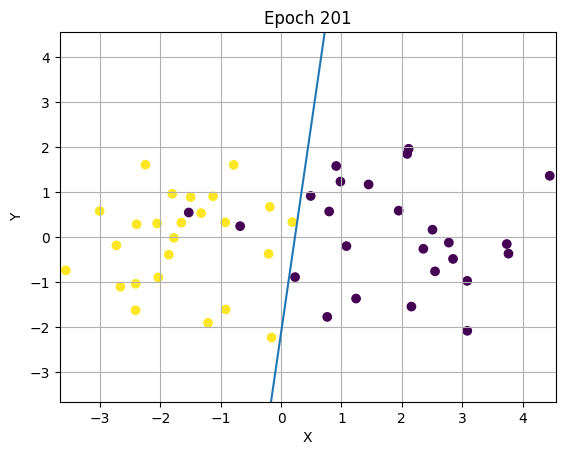

Epoch  202  :  1.8749841092725743
Epoch  203  :  1.8627079401685123
Epoch  204  :  1.8505009584104308
Epoch  205  :  1.8383636403803647
Epoch  206  :  1.8262964267643933
Epoch  207  :  1.8142997236388065
Epoch  208  :  1.8023739035333086
Epoch  209  :  1.7905193064714091
Epoch  210  :  1.7787362409882432
Epoch  211  :  1.7670249851260587
Epoch  212  :  1.7553857874075145
Epoch  213  :  1.743818867787127
Epoch  214  :  1.73232441858104
Epoch  215  :  1.7209026053753844
Epoch  216  :  1.7095535679135407
Epoch  217  :  1.698277420962475
Epoch  218  :  1.6870742551585178
Epoch  219  :  1.6759441378328237
Epoch  220  :  1.6648871138167924
Epoch  221  :  1.6539032062277559
Epoch  222  :  1.642992417235243
Epoch  223  :  1.6321547288080775
Epoch  224  :  1.6213901034426548
Epoch  225  :  1.6106984848726966
Epoch  226  :  1.6000797987607454
Epoch  227  :  1.5895339533717885
Epoch  228  :  1.579060840229254
Epoch  229  :  1.5686603347537162
Epoch  230  :  1.5583322968846394
Epoch  231  :  1.548

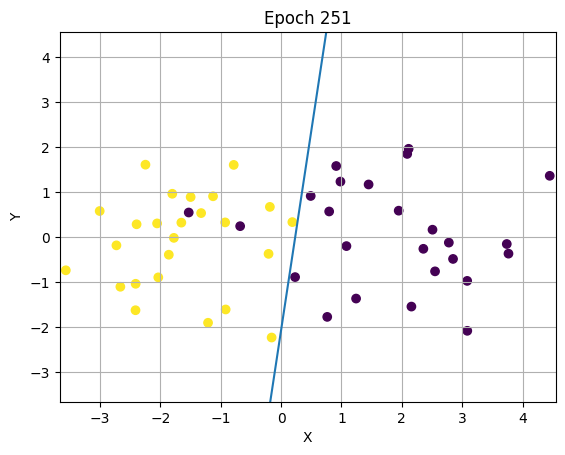

Epoch  252  :  1.3490066904305151
Epoch  253  :  1.3402791855865717
Epoch  254  :  1.3316174915268457
Epoch  255  :  1.3230212398652559
Epoch  256  :  1.3144900579378627
Epoch  257  :  1.3060235690789666
Epoch  258  :  1.2976213928881688
Epoch  259  :  1.2892831454886444
Epoch  260  :  1.2810084397768216
Epoch  261  :  1.2727968856637548
Epoch  262  :  1.2646480903083221
Epoch  263  :  1.2565616583425556
Epoch  264  :  1.2485371920892343
Epoch  265  :  1.2405742917720282
Epoch  266  :  1.2326725557182883
Epoch  267  :  1.224831580554801
Epoch  268  :  1.2170509613966305
Epoch  269  :  1.2093302920292126
Epoch  270  :  1.2016691650839895
Epoch  271  :  1.1940671722076543
Epoch  272  :  1.1865239042252564
Epoch  273  :  1.1790389512973132
Epoch  274  :  1.1716119030710952
Epoch  275  :  1.1642423488262743
Epoch  276  :  1.1569298776150743
Epoch  277  :  1.1496740783970865
Epoch  278  :  1.142474540168923
Epoch  279  :  1.1353308520888157
Epoch  280  :  1.1282426035963808
Epoch  281  :  1

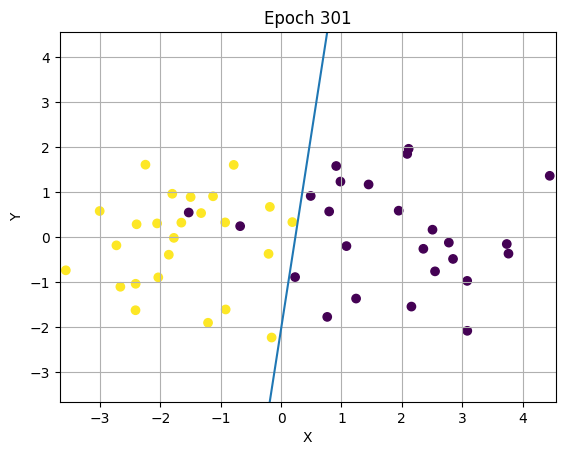

Epoch  302  :  0.9855065305883209
Epoch  303  :  0.9795821718164569
Epoch  304  :  0.9737037222378028
Epoch  305  :  0.9678708056043565
Epoch  306  :  0.9620830477569208
Epoch  307  :  0.9563400766573321
Epoch  308  :  0.950641522418738
Epoch  309  :  0.9449870173339401
Epoch  310  :  0.9393761959019163
Epoch  311  :  0.9338086948525411
Epoch  312  :  0.9282841531696197
Epoch  313  :  0.9228022121122176
Epoch  314  :  0.9173625152344608
Epoch  315  :  0.9119647084037054
Epoch  316  :  0.9066084398173175
Epoch  317  :  0.9012933600179376
Epoch  318  :  0.8960191219074104
Epoch  319  :  0.8907853807593733
Epoch  320  :  0.8855917942305555
Epoch  321  :  0.8804380223708478
Epoch  322  :  0.875323727632181
Epoch  323  :  0.8702485748762645
Epoch  324  :  0.8652122313812234
Epoch  325  :  0.8602143668471688
Epoch  326  :  0.8552546534007518
Epoch  327  :  0.850332765598744
Epoch  328  :  0.8454483804306742
Epoch  329  :  0.8406011773205566
Epoch  330  :  0.8357908381277551
Epoch  331  :  0.

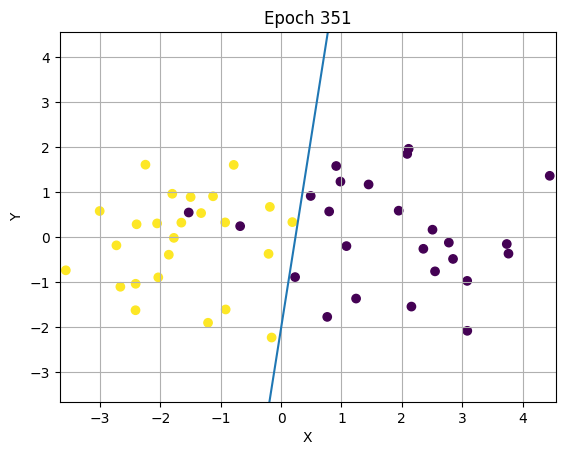

Epoch  352  :  0.7386766748852487
Epoch  353  :  0.7346319548915693
Epoch  354  :  0.7306171840702849
Epoch  355  :  0.7266321035170532
Epoch  356  :  0.7226764565743736
Epoch  357  :  0.7187499888190892
Epoch  358  :  0.714852448049664
Epoch  359  :  0.7109835842732375
Epoch  360  :  0.7071431496925038
Epoch  361  :  0.7033308986923963
Epoch  362  :  0.6995465878265802
Epoch  363  :  0.6957899758038155
Epoch  364  :  0.6920608234741593
Epoch  365  :  0.688358893815011
Epoch  366  :  0.6846839519170624
Epoch  367  :  0.6810357649700909
Epoch  368  :  0.6774141022486894
Epoch  369  :  0.673818735097854
Epoch  370  :  0.6702494369185007
Epoch  371  :  0.6667059831529144
Epoch  372  :  0.6631881512700949
Epoch  373  :  0.6596957207510601
Epoch  374  :  0.6562284730740823
Epoch  375  :  0.6527861916998804
Epoch  376  :  0.6493686620567619
Epoch  377  :  0.6459756715257334
Epoch  378  :  0.6426070094255881
Epoch  379  :  0.6392624669979533
Epoch  380  :  0.6359418373923362
Epoch  381  :  0.

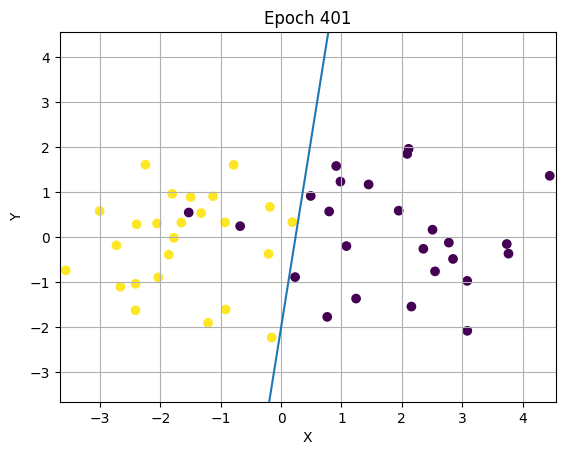

Epoch  402  :  0.5685424164928434
Epoch  403  :  0.565718856109296
Epoch  404  :  0.5629147778006368
Epoch  405  :  0.5601300176008522
Epoch  406  :  0.557364413071877
Epoch  407  :  0.5546178032897308
Epoch  408  :  0.5518900288307541
Epoch  409  :  0.549180931757916
Epoch  410  :  0.5464903556072135
Epoch  411  :  0.5438181453741266
Epoch  412  :  0.5411641475001947
Epoch  413  :  0.5385282098596446
Epoch  414  :  0.5359101817461217
Epoch  415  :  0.5333099138595043
Epoch  416  :  0.5307272582928052
Epoch  417  :  0.528162068519165
Epoch  418  :  0.5256141993789232
Epoch  419  :  0.5230835070667986
Epoch  420  :  0.5205698491191422
Epoch  421  :  0.5180730844012912
Epoch  422  :  0.5155930730950166
Epoch  423  :  0.5131296766860527
Epoch  424  :  0.5106827579517307
Epoch  425  :  0.5082521809487024
Epoch  426  :  0.5058378110007502
Epoch  427  :  0.503439514686701
Epoch  428  :  0.5010571598284308
Epoch  429  :  0.498690615478959
Epoch  430  :  0.4963397519106444
Epoch  431  :  0.494

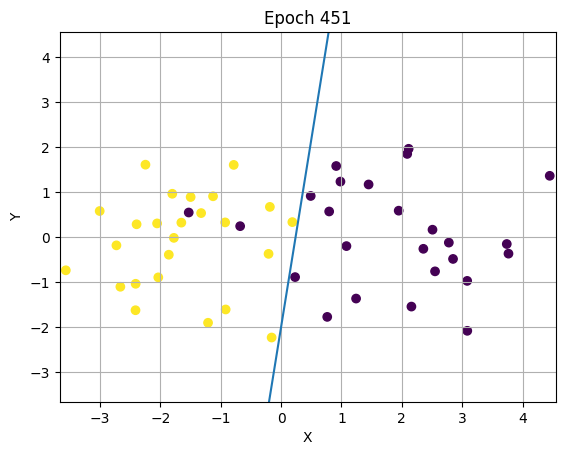

Epoch  452  :  0.44834009819998977
Epoch  453  :  0.4463167233503049
Epoch  454  :  0.44430625257619016
Epoch  455  :  0.44230858307137855
Epoch  456  :  0.44032361297482303
Epoch  457  :  0.4383512413613903
Epoch  458  :  0.4363913682326318
Epoch  459  :  0.43444389450764487
Epoch  460  :  0.4325087220140281
Epoch  461  :  0.4305857534789094
Epoch  462  :  0.42867489252007374
Epoch  463  :  0.42677604363716015
Epoch  464  :  0.4248891122029541
Epoch  465  :  0.42301400445476456
Epoch  466  :  0.42115062748587284
Epoch  467  :  0.41929888923707787
Epoch  468  :  0.41745869848831174
Epoch  469  :  0.41562996485034265
Epoch  470  :  0.41381259875656395
Epoch  471  :  0.41200651145484446
Epoch  472  :  0.41021161499948855
Epoch  473  :  0.40842782224323965
Epoch  474  :  0.40665504682939485
Epoch  475  :  0.4048932031839748
Epoch  476  :  0.40314220650798305
Epoch  477  :  0.4014019727697382
Epoch  478  :  0.3996724186972781
Epoch  479  :  0.3979534617708469
Epoch  480  :  0.3962450202154

In [18]:
w2, erreur2 = apprentissage_widrow(P2_DATA.T, CLASSIF, 500, 25)
print('W2 : ', w2)

**Indiquez graphiquement quelques étapes de l’apprentissage (ensemble et droite de séparation).**

Voir ci-dessus.

**Représentez l’erreur en fonction des itérations. Comparez avec le test précédent.**

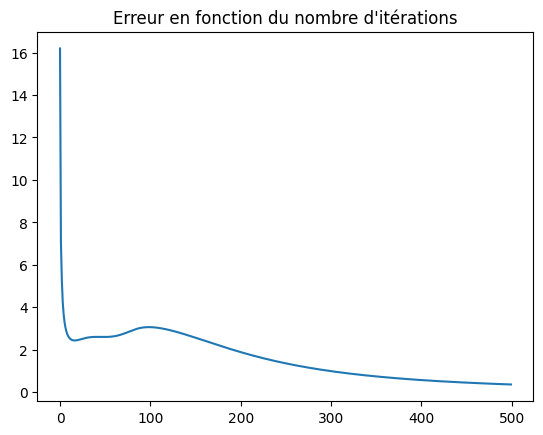

In [19]:
plt.title("Erreur en fonction du nombre d'itérations")
plt.plot(erreur2)
plt.show()

On observe pour ce deuxième échantillon que l'erreur de classification ne tend pas vers 0. En effet, il y a des individus qui sont mal classés. Dû à la nature des données, il est difficile de trouver une droite séparatrice qui sépare les deux classes. Pour autant, on observe que la droite séparatrice est bien la droite qui sépare les deux classes au mieux. Il est également intéressant de noter que l'erreur réaugmente pendant un certain temps puis diminue à nouveau cette fois-ci vers 0.

**Faites quelques tests avec des initialisations différentes, commenter le résultat après convergence.**

Voir ci-dessus.

### 1.3 Perceptron multicouches

#### 1.3.1. Mise en place d'un perceptron multicouche

* *Créez la fonction `multiperceptron(x, w1, w2)`*

In [20]:
def multiperceptron(x, w1, w2):
    
    def activation(x): 
        return 1 / (1 + np.exp(-x))

    x = np.array([1, x[0], x[1]])

    u1 = np.dot(w1[:, 0], x)
    u2 = np.dot(w1[:, 1], x)

    y1 = activation(u1)
    y2 = activation(u2)

    uf = np.dot(w2, np.array([1, y1, y2]))
    
    yf = activation(uf)

    return ([y1, y2], yf)


**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer le perceptron Multicouche**

Nous avons tout d'abord créé une fonction `activation` qui prend en paramètre un vecteur et qui renvoie le vecteur des valeurs de la fonction sigmoïde appliquée à chaque élément du vecteur. Ensuite nous avons créé la fonction `multiperceptron` qui prend en paramètre un vecteur `x` et deux matrices `w1` et `w2`. Cette fonction renvoie la sortie du perceptron multicouche. Pour cela, nous avons tout d'abord traversé la couche cachée en appliquant la fonction sigmoïde à la multiplication de `x` et `w1`. Ensuite nous avons traversé la couche de sortie en appliquant la fonction sigmoïde à la multiplication du résultat précédent et `w2`. Enfin, nous avons renvoyé le résultat de la couche de sortie.

* *Testez votre perceptron multicouches avec l'exemple ci-dessous pour un entrée `x = [1 1]` :*  
  
<img src="exemple_1_3_1.jpg" width="600">

**Indiquez le résultat numérique et par calcul (en donnant le détail) pour le test demandé**

In [22]:
x = np.array([1, 1])
w1 = np.array([[-.5, .5], [2., .5], [-1., 1.]])
w2 = np.array([2., -1., 1.])

result = multiperceptron(x, w1, w2)

print('y1 =', result[0][0])
print('y2 =', result[0][1])
print('yf =', result[1])

y1 = 0.6224593312018546
y2 = 0.8807970779778823
yf = 0.9053673095402572


On observe ci-dessus que le résultat est environ égal à 0.91. Pour le calcul, on a :

u1 = 1 * -0.5 + 1 * 2 + 1 * -1 = 0.5  
y1 = 1 / (1 + exp(-0.5)) = 0.62
 
u2 = 1 * 0.5 + 1 * 0.5 + 1 * 1 = 2  
y2 = 1 / (1 + exp(-2)) = 0.88

uf = 1 * 2 + 0.62 * -1 + 0.88 * 1 = 2.26  
yf = 1 / (1 + exp(-uf)) = 0.91

#### 1.3.2. Programmation apprentissage multicouches

* *Créez une fonction `multiperceptron_widrow(x, yd, epoch, batch_size)`*

In [24]:
ALPHA = 0.5

def multiperceptron_widrow(x, yd, epoch, batch_size):
    def derivative(x): 
        return x * (1 - x)

    w1 = np.random.rand(3, 2) - 0.5
    w2 = np.random.rand(3) - 0.5
    new_w1 = np.zeros((3, 2))
    new_w2 = np.zeros((3))
    errors = np.zeros((epoch))

    for i in range(epoch):
        for j in range(x.shape[1]):
            indiv = x[:, j]
            target = yd[j]

            y1_predict, yf_predict = multiperceptron(indiv, w1, w2)

            errors[i] += (target - yf_predict)**2

            rf = -(target - yf_predict) * derivative(yf_predict)

            r11 = w2[1] * rf * derivative(y1_predict[0])
            r12 = w2[2] * rf * derivative(y1_predict[1])

            indiv = np.array([1, indiv[0], indiv[1]])

            new_w1[:, 0] += - ALPHA * r11 * indiv
            new_w1[:, 1] += - ALPHA * r12 * indiv

            y1_predict = np.array([1, y1_predict[0], y1_predict[1]])

            new_w2 += - ALPHA * rf * y1_predict

            if j % batch_size == 0:
                w1 += new_w1
                w2 += new_w2
                new_w1 = np.zeros((3, 2))
                new_w2 = np.zeros((3))
                
        error = round(errors[i], 3)

        print("epoch", i + 1, " : ", error)

        if error < 0.01:
            break

    return w1, w2, errors

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer l’apprentissage Multicouche.**

Nous avons tout d'abord créé une fonction `multiperceptron_widrow` qui prend en paramètre un vecteur `x`, un vecteur `yd`, un entier `epoch` et un entier `batch_size`. Cette fonction renvoie les matrices `w1` et `w2` et `errors` après apprentissage. Pour cela, nous avons tout d'abord créé les matrices `w1` et `w2` aléatoirement. Ensuite nous avons créé une boucle qui va s'exécuter `epoch` fois. Dans cette boucle, nous passons par chaque individu de l'échantillon `x`. Pour chaque individu, nous calculons la sortie du perceptron multicouche. Ensuite nous calculons l'erreur de classification. Enfin nous mettons à jour les matrices `w1` et `w2` tous les `batch_size` individus. Enfin nous renvoyons les matrices `w1` et `w2` et `errors`.

* *Créez l'ensemble d'apprentissage*

In [25]:
x = np.array([[0, 1, 0, 1], [0, 0, 1, 1]])
yd = np.array([0, 1, 1, 0])
epoch = 20000

* *Affichez cet ensemble avec la fonction `affiche_classe`*

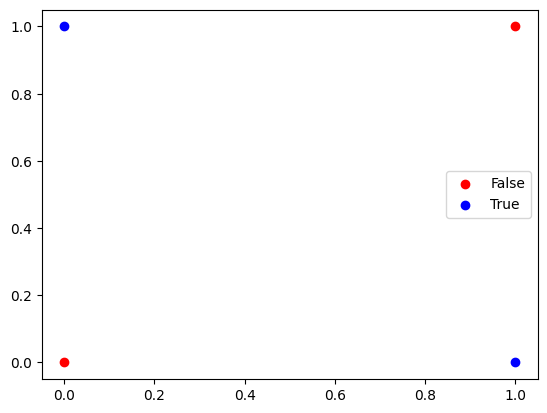

In [26]:
plt.scatter(x[0, yd == 0], x[1, yd == 0], c='r')
plt.scatter(x[0, yd == 1], x[1, yd == 1], c='b')
plt.legend(['False', 'True'])
plt.show()

* *Pensez-vous que ce problème puisse être traité par un perceptron simple ?*

Nous ne pouvons pas traiter ce problème avec un perceptron simple car il n'est pas linéairement séparable. En effet, il n'existe pas de droite qui sépare les deux classes.

* *Appliquez votre algorithme d'apprentissage*

In [32]:
w1, w2, erreur = multiperceptron_widrow(x, yd, epoch, 4)
print(erreur)

epoch 1  :  1.062
epoch 2  :  1.038
epoch 3  :  1.03
epoch 4  :  1.023
epoch 5  :  1.018
epoch 6  :  1.014
epoch 7  :  1.011
epoch 8  :  1.009
epoch 9  :  1.007
epoch 10  :  1.006
epoch 11  :  1.004
epoch 12  :  1.004
epoch 13  :  1.003
epoch 14  :  1.003
epoch 15  :  1.002
epoch 16  :  1.002
epoch 17  :  1.002
epoch 18  :  1.001
epoch 19  :  1.001
epoch 20  :  1.001
epoch 21  :  1.001
epoch 22  :  1.001
epoch 23  :  1.001
epoch 24  :  1.001
epoch 25  :  1.001
epoch 26  :  1.001
epoch 27  :  1.0
epoch 28  :  1.0
epoch 29  :  1.0
epoch 30  :  1.0
epoch 31  :  1.0
epoch 32  :  1.0
epoch 33  :  1.0
epoch 34  :  1.0
epoch 35  :  1.0
epoch 36  :  1.0
epoch 37  :  1.0
epoch 38  :  1.0
epoch 39  :  1.0
epoch 40  :  1.0
epoch 41  :  1.0
epoch 42  :  1.0
epoch 43  :  1.0
epoch 44  :  1.0
epoch 45  :  1.0
epoch 46  :  1.0
epoch 47  :  1.0
epoch 48  :  1.0
epoch 49  :  1.0
epoch 50  :  1.0
epoch 51  :  1.0
epoch 52  :  1.0
epoch 53  :  1.0
epoch 54  :  1.0
epoch 55  :  1.0
epoch 56  :  1.0
epoch 

**Représentez l’erreur en fonction des itérations. Commentez.**

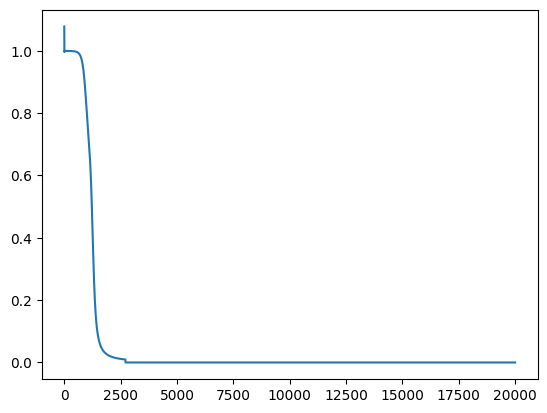

In [30]:
plt.plot(erreur)
plt.show()

Voir ci-dessus.

* *Testez, à partir de votre fonction `multiperceptron`, le réseau de neurones ainsi obtenu sur l'ensemble d'apprentissage*

**Testez votre structure après apprentissage et montrez que c’est bien un XOR.**

In [29]:
def get_y_result(x_coords):
    return round(
        multiperceptron(np.array(x_coords), w1, w2)[1]
    )

print('x = [0, 0] | y =', get_y_result([0, 0]))
print('x = [0, 1] | y =', get_y_result([0, 1]))
print('x = [1, 0] | y =', get_y_result([1, 0]))
print('x = [1, 1] | y =', get_y_result([1, 1]))

x = [0, 0] | y = 0
x = [0, 1] | y = 1
x = [1, 0] | y = 1
x = [1, 1] | y = 0


On observe ci-dessus que le résultat est bien un XOR. En effet, on a pour :  
- `x = [0 0]` => `y = 0`  
- `x = [0 1]` => `y = 1`  
- `x = [1 0]` => `y = 1`  
- `x = [1 1]` => `y = 0`  

* *Affichez les droites séparatrices associées aux différents neurones et les points de l'ensemble d'apprentissage*

**Représentez les trois droites séparatrices et l’ensemble d’apprentissage. Expliquez le fonctionnement.**

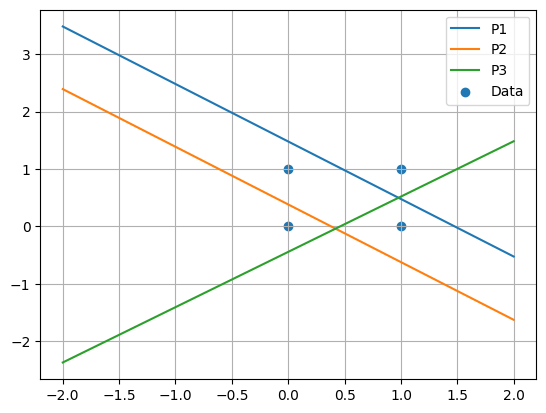

In [33]:
x = np.linspace(-2, 2)

y = (w1[0, 0] + x*w1[1, 0]) / (-w1[2, 0])
y2 = (w1[0, 1] + x*w1[1, 1]) / (-w1[2, 1])
y3 = (w2[0] + x*w2[1]) / (-w2[2])

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.scatter(X[:, 0], X[:, 1])
plt.legend(['P1', 'P2', 'P3', 'Data'])
plt.grid()
plt.show()

On observe que le premier perceptron de la couche cachée permet d'isoler un individu et que le second permet d'isoler le deuxième individu de la même classe. Ces 2 premiers perceptron permettent donc de séparer les individus en 2 classes.

## 2. Deep et Full-connected : discrimination d'une image

### 2.1. Approche basée Descripteurs (basée modèle)

#### 2.1.1. Calcul des descripteurs

* *Importez les différents tableaux de mesure et créez un vecteur de label indiquant la classe sous forme d'un chiffre de chaque image*

In [35]:
import pandas as pd

WANG_PATH = "res\\WangSignatures.xlsx"

# Definition of categories of the dataset
CATEGORIES = [
    'Jungle',
    'Plage',
    'Monuments',
    'Bus',
    'Dinosaures',
    'Éléphants',
    'Fleurs',
    'Chevaux',
    'Montagne',
    'Plats'
]

Measures = []

for i in range(5):

    X = pd.read_excel(
        WANG_PATH,
        sheet_name = i,
        index_col = 0,
        header = None
    )

    if i == 0: Measures = X.values
    else:
        Data = X.values
        Measures = (np.concatenate((Measures, Data), axis = 1))

Labels = np.array([
    int(nom[0:-4]) // 100 for nom in X.index
])

**Explicitez comment sous Python vous avez importé et créé votre corpus : vecteurs de labels, ensemble d'apprentissage, ensemble de tests.**

Afin d'importer les différents tableaux de mesure, nous nous sommes servis de la fonction `read_excel` fournie par la librairie `pandas` et qui était la plus appropriée à notre besoin. Nous avons au préalable établi un tableau des catégories `CATEGORIES` de manière à pouvoir récupérer le nom de la catégorie à partir de la classe définie, et plus tard prédite.

Pour chacune des images, nous avons récupérer les valeurs contenues dans l'ensemble de mesures `PHOG` dans un premier temps (telles quel), puis pour le reste des ensembles, nous avons choisi de concaténer les nouvelles mesures aux précédentes. En guise d'illustration, voici à quoi ressemble la combinaison pour une image `img` donnée :  
* `Measures[img] = [ [PHOG], [JCD], [CEDD], [FCTH], [FuzzyColorHistogram] ]`



#### 2.1.2. Mise en place d'un système de discrimination basé structure Full-Connected

* *Mettez en place un système de discrimination qui pour la présentation d'une image inconnue et de son vecteur de mesures associé propose une classe*

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Target = np.array([np.eye(10)[Labels[i]] for i in range(len(Labels))])

X_train, X_test, Y_train, Y_test = train_test_split(
    Measures,
    Target,
    test_size = 0.2, # Fixed value to 2% of the dataset
    random_state = 1,
    stratify = Labels
)

# Building of the dense model
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    validation_split = 0.8,
    epochs = 40, batch_size = 32,
    verbose = 0
)

Y_predict = model.predict(X_test, verbose=0)

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisé pour développer le perceptron Full Connected.**

Pour développer notre perceptron ***Full Connected***, nous avons initialisé un modèle séquentiel composé de trois couches denses, rescpectivement de 128, 64 et 10 neurones. Le modèle est optimisé par adam lors de sa compilation. Nos ensembles d'apprentissage et de test sont initialisés à l'aide de la fonction `test_train_split()` fournie par `sklearn` dans laquelle nous avons chargé notre ensemble de mesures précédemment calculé puis fixé l'ensemble de test à 20%. 

* *Testez la procédure de la classification avec les 5 types de mesures et différentes images inconues.*

In [ ]:
def test_image_classification(nb_images = 5):

    images = [np.random.randint(0, len(X_test)) for i in range(nb_images)]

    for img in images:
        true_class = np.argmax(Y_test[img])
        pred_class = np.argmax(Y_predict[img])
        accuracy = round(Y_predict[img][pred_class] * 100, 2)
        print(f"Image n°{img} of class {true_class} => Category [{CATEGORIES[true_class]}]")
        print(f"Model prediction : Class = {pred_class} => Category [{CATEGORIES[pred_class]}] | Accuracy = {accuracy}%")
        print()

test_image_classification()

* *Analyser les résultats (matrice de confusion, taux d'erreur)*

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def display_loss_accuracy():
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('Loss of the model')
    ax1.plot(history.history['loss'], 'r--', label = 'Loss of training data')
    ax1.plot(history.history['val_loss'], 'r', label = 'Loss of validation data')
    ax1.legend()
    ax2.set_title('Accuracy of the model')
    ax2.plot(history.history['accuracy'], 'g--', label = 'Accuracy of training data')
    ax2.plot(history.history['val_accuracy'], 'g', label = 'Accuracy of validation data')
    ax2.legend()

def display_confusion_matrix():
    ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(
            np.argmax(Y_test, axis = 1),
            np.argmax(Y_predict, axis = 1)
        ),
        display_labels = [ c[0] for c in CATEGORIES ]
    ).plot()
    plt.title('Confusion matrix of the model')
    plt.show()

display_loss_accuracy()
display_confusion_matrix()

D'après la matrice de confusion, notre configuration atteint un taux de réussite moyen de **73%**, ce qui semble correspondre à la mesure de précision illustrée par le graphique.

**Comparez la qualité de la discrimination en fonction de la caractéristique utilisée ou du cumul de toutes les mesures.**

TODO : réponse

* *Comparez avec différents hyperparamètres ????(nombre de neurones, nombre de couches, nombre d'itérations, taille du batch)????*

**Avec les meilleures combinaisons de mesures, paramétrez au mieux l'algorithme Full Connected.**

In [ ]:
Measures = []

for i in range(5):

    X = pd.read_excel(
        WANG_PATH,
        sheet_name = i,
        index_col = 0,
        header = None
    )
    # Only taking CEDD set of measures
    if i == 2: Measures = X.values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    Measures,
    Target,
    test_size = 0.5,
    random_state = 1,
    stratify = Labels
)

# Building of the dense model
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    validation_split = 0.5,
    epochs = 100, batch_size = 32,
    verbose = 0
)

Y_predict = model.predict(X_test, verbose = 0)

Voici la meilleure combinaison trouvée :
- Construction du vecteur comprenant les mesures de chacunce des images uniquement basé sur les valurs de la feuille associée à l'ensemble **CEDD**
- 

**Avec le meilleur discriminateur, évaluez la qualité de la procédure de discrimination selon la classe d'images.**

In [ ]:
display_loss_accuracy()
display_confusion_matrix()

D'après la matrice de confusion, notre perceptron a un taux de réussite de 92% dans la classification des images.

In [ ]:
test_image_classification()

On observe qu'en modifiant les discriminateurs, la précision (et de fait la véracité) de notre classification s'est nettement améliorée.

#### 2.1.3. Approche "Deep" (basée Data)

* *Mettez en place un système de classification qui a en données une image, calcul les descripteurs par des couches de convolution*

In [36]:
import cv2

IMAGES_PATH = 'res\\Wang\\'
IMAGE_EXT = '.jpg'
IMAGE_SIZE = 256

IMAGE_NAMES = np.array([
    (IMAGES_PATH + str(i) + IMAGE_EXT) for i in range(len(Labels))
])

X = []

Target = np.zeros([len(Labels), 10], 'int')
it = 0

for img_name in IMAGE_NAMES:
    category = int(img_name[len(IMAGES_PATH):-len(IMAGE_EXT)]) // 100
    Target[it, category] = 1
    img = cv2.resize(
        cv2.imread(img_name), # Retrieving the image
        (IMAGE_SIZE, IMAGE_SIZE)
    ) # Resizing the image
    X.append(img)
    it += 1

In [37]:
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten

dim_img = X[0].shape
X = np.array(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Target,
    test_size=0.2,
    random_state=1
)

# Building of the convolutional model
model = Sequential()
model.add(Conv2D(
    32, (3, 3),
    activation = 'relu',
    padding = 'same',
    input_shape = dim_img
))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    epochs = 10, batch_size = 32,
    verbose = 0
)

Y_predict = model.predict(X_test, verbose=0)

NameError: name 'train_test_split' is not defined

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer votre structure Deep.**

* *Testez des structures simples*

In [ ]:
test_image_classification()

**Comparez la qualité de la discrimination en fonction des caractéristiques du réseau. Étudiez notamment l'évolution de la fonction de coût/précision.**

In [ ]:
display_loss_accuracy()
display_confusion_matrix()

TODO : Réponse

* *Comparez les résultats avec les méthodes basées caractéristiques*

In [ ]:
model = Sequential()

model.add(Conv2D(
    8, (5, 5),
    activation = 'relu',
    padding = 'same',
    input_shape = dim_img
))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(
    16, (3, 3),
    activation = 'relu',
    padding = 'same',
    input_shape = dim_img
))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    epochs=15,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 0
)

Y_predict = model.predict(X_test, verbose = 0)

In [ ]:
display_loss_accuracy()
display_confusion_matrix()

In [35]:
from keras.applications.xception import Xception
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

modele_transfer = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = dim_img
)

for layer in modele_transfer.layers:
    layer.trainable = False

x = modele_transfer.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
out = Dense(10, activation='softmax')(x)

model = Model(modele_transfer.input, out)

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    epochs = 15,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 0
)

Y_predict = model.predict(X_test, verbose = 0)

In [ ]:
display_loss_accuracy()
display_confusion_matrix()

test_image_classification()

**Faites progresser les résultats avec une procédure de Data Augmentation.**

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.data import Dataset

data_augmentation = Sequential()

data_augmentation.add(RandomFlip("horizontal"))
data_augmentation.add(RandomRotation(0.1))

dataset = Dataset.from_tensor_slices((X_train, Y_train))
dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

# Building the sequential model and implementing Data augmentation
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(
    32, (5, 5),
    activation = 'relu',
    padding = 'same',
    input_shape = dim_img
))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(
    64, (3, 3),
    activation = 'relu',
    padding = 'same',
    input_shape = dim_img
))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    epochs = 30,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 0
)

Y_predict = model.predict(X_test, verbose = 0)

In [ ]:
display_loss_accuracy()
display_confusion_matrix()

test_image_classification()